In [15]:
import qiskit
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

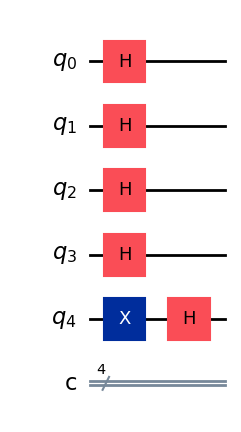

In [16]:
t = 4
eigenstate = 1
total_input = t + eigenstate

qc = QuantumCircuit(total_input,t)

qc.x(t)
qc.h(t)

for i in range (t):
    qc.h(i)

qc.draw(output='mpl')

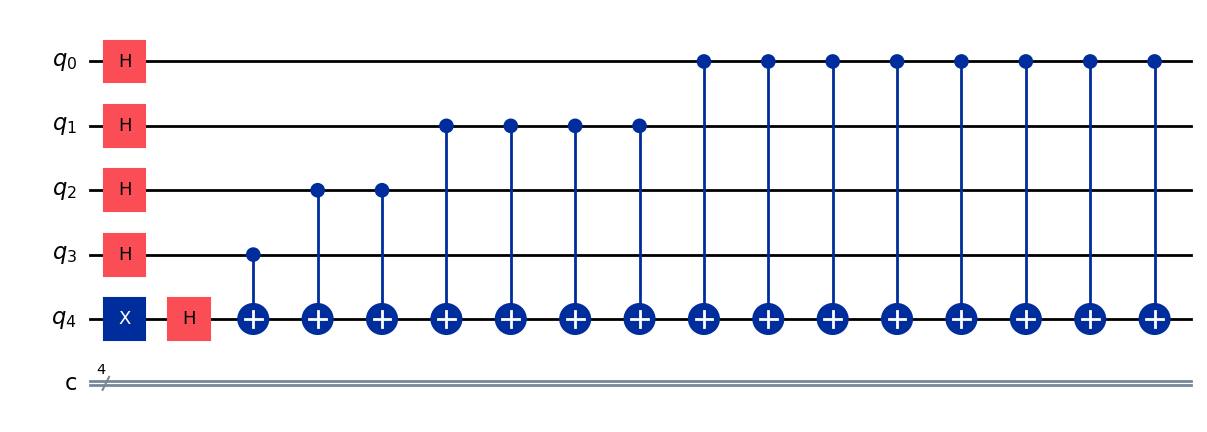

In [17]:

def controlled_U(circuit, control_qubit, target_qubit, power):

    for _ in range(power):
        circuit.cx(control_qubit, target_qubit)


for i in (range (t)):
    power = 2 ** i
    controlled_U(qc, t - 1 - i, t, power)

qc.draw(output='mpl')

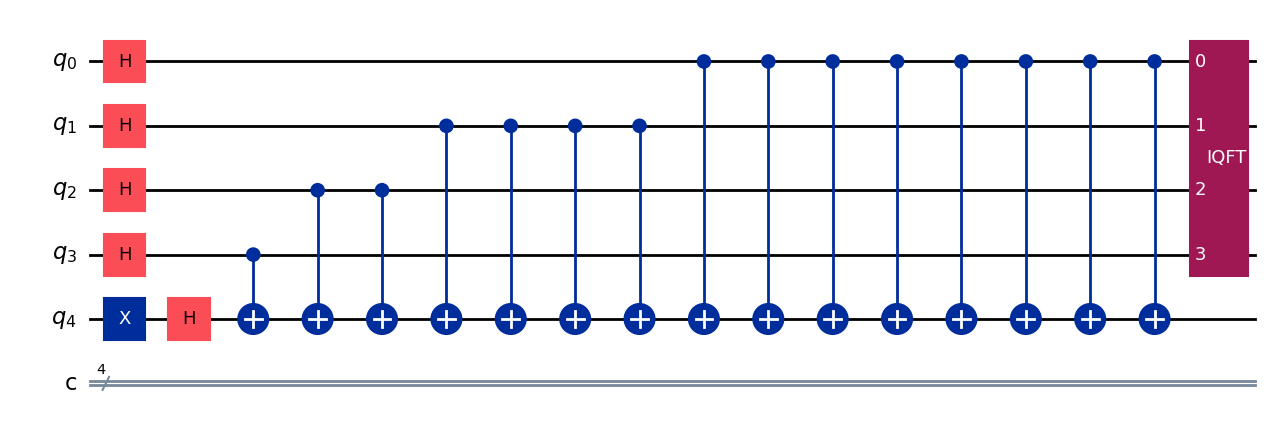

In [18]:
#state 3

qc.append(QFT(num_qubits=t, inverse=True, do_swaps=False), range(t))
qc.draw(output='mpl')

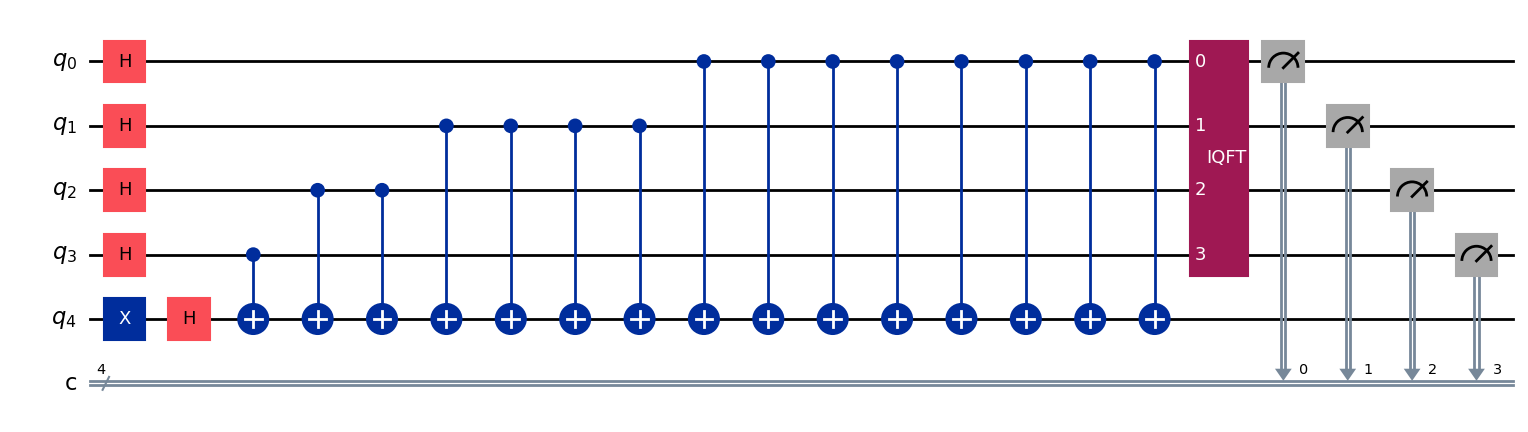

In [19]:
#state 4

qc.measure(range(t), range(t))
qc.draw(output='mpl')

In [20]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

C:\Users\26550\AppData\Local\Temp\ipykernel_11548\904976604.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Counts: {'1000': 1024}


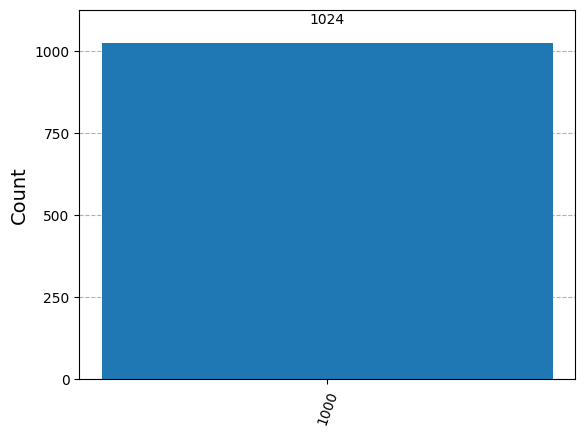

In [21]:
counts = result.get_counts(qc)
print("Counts:", counts)

# Plot the result
plot_histogram(counts)